## Iris Data Set
This problem sheet relates to the [Iris data set](https://archive.ics.uci.edu/ml/datasets/iris) and uses jupyter, numpy and pyplot. Problems are labelled 1 to 10. 

#### 1. Get and load the Iris data.

In [1]:
# Adapted from https://docs.python.org/3.1/library/csv.html
import csv

filename = 'data.csv'
sLen = []
sWid = []
pLen = []
pWid = []
classification = []

with open(filename, 'rt') as f:
    dataFile = csv.reader(f)
    for index, row in enumerate(dataFile):
        sLen.append(row[0])
        sWid.append(row[1])
        pLen.append(row[2])
        pWid.append(row[3])
        classification.append(row[4])
        
        if index < 10: # Limiting for the sake of tidiness
            print (row)

['5.1', '3.5', '1.4', '0.2', 'Iris-setosa']
['4.9', '3.0', '1.4', '0.2', 'Iris-setosa']
['4.7', '3.2', '1.3', '0.2', 'Iris-setosa']
['4.6', '3.1', '1.5', '0.2', 'Iris-setosa']
['5.0', '3.6', '1.4', '0.2', 'Iris-setosa']
['5.4', '3.9', '1.7', '0.4', 'Iris-setosa']
['4.6', '3.4', '1.4', '0.3', 'Iris-setosa']
['5.0', '3.4', '1.5', '0.2', 'Iris-setosa']
['4.4', '2.9', '1.4', '0.2', 'Iris-setosa']
['4.9', '3.1', '1.5', '0.1', 'Iris-setosa']


#### 2. Write a note about the data set.  
The [Iris data set](https://archive.ics.uci.edu/ml/datasets/iris) was created by Ronald Fisher in 1936 and contains 50 samples from each of the three species of Iris - Iris setosa, Iris virginica and Iris versicolor. The structure of the set is as follows: *sepal length, sepal width, petal length, petal width, classification*. A raw copy of the data set can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data).  

#### 3. Create a simple plot.
Use pyplot to create a scatter plot of sepal length on the x-axis versus sepal width on the y-axis.

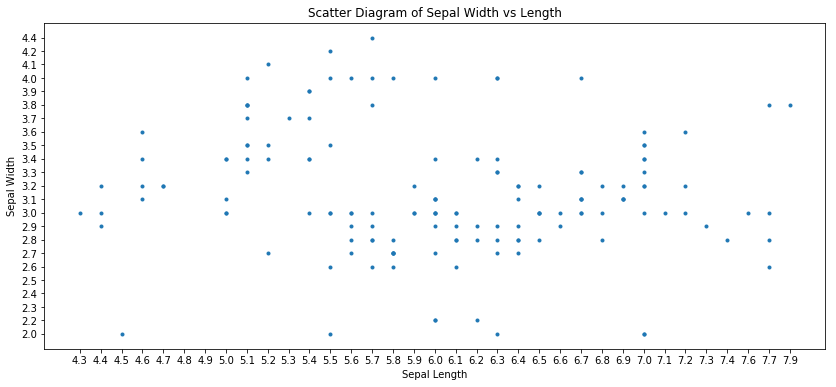

In [2]:
import matplotlib.pyplot as pl

pl.rcParams['figure.figsize'] = (14.0, 6.0) # Adapted from gradient descent notebook: https://github.com/emerging-technologies/emerging-technologies.github.io/blob/master/notebooks/gradient-descent.ipynb
pl.scatter(sLen, sWid, marker='.')

pl.title('Scatter Diagram of Sepal Width vs Length')
pl.xlabel('Sepal Length')
pl.ylabel('Sepal Width')
pl.show()